<style>
@import url(https://www.numfys.net/static/css/nbstyle.css);
</style>
<a href="https://www.numfys.net"><img class="logo" /></a>

# Intermediate plotting

### Modules - Basics
<section class="post-meta">
Eilif Sommer Øyre, Thorvald Ballestad, Niels Henrik Aase, and Jon Andreas Støvneng.
</section>
Last edited: December 21th 2019

___

## Scope of this notebook
This notebook can be used as reference for basic/intermediate plotting in Python using the library *Matplotlib*. The content will most likely be useful for the beginner and intermediate matplotlib user. We will use functions from the Python library NumPy. See [this](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/introduction_to_numpy.ipynb) notebook for an introduction, and [this]() module for an intermediate tutorial on NumPy. The topic Colormesh, contour, quiver, and stream plots will make use of some NumPy functions of intermediate level.

The scope of this notebook is reflected in the content list below.
* [Figure formating](#ff)
   - [Style of plot](#ff:1)
   - [Size and resolution of figure](#ff:2)
   - [Fontsize, values and limits of axes](#ff:3)
   - [Setting common figure parameters](#ff:4)
   - [Predefined style sheets](#ff:5)
* [Subplots](#sp)
* [Colourmesh, contour, quiver and stream plots](#cc)
* [3D plots](#3d)

## A quick review of basics
The code cell below summarises the plotting techniques introduced in the notebook "[Basic Plotting](https://nbviewer.jupyter.org/urls/www.numfys.net/media/notebooks/basic_plotting.ipynb)" with comments on each line. If you want a more detailed explanation of this basic plot, see the aforementioned notebook.

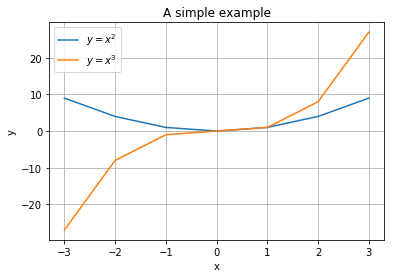

In [1]:
import matplotlib.pyplot as plt  # This command import the plotting library and aliases it as plt.
%matplotlib inline               
# This is an exclusive jupyter notebook command to show the plots,
# which can be ignored if you are not working in jupyter notebook.
import numpy as np               # Import the numerical python toolkit NumPy

xValuesOfData = [-3, -2, -1, 0, 1, 2, 3]    # List of x-values
xValuesOfData = np.array(xValuesOfData)     # Convert the python list to a NumPy-array. To enable easy
                                            # use of mathematical operations.
yValuesOfData1 = xValuesOfData**2
yValuesOfData2 = xValuesOfData**3

plt.plot(xValuesOfData, yValuesOfData1, label='$y = x^2$')
# The line above plots a 2D line (f(x) = x^2) and labels it.
# plt.plot(listOfX-valuesOfDataPoints, listOfY-valuesOfDataPoints, label=nameOfPlot)
plt.plot(xValuesOfData, yValuesOfData2, label='$y = x^3$')
plt.grid()                       # Activates grid
plt.title('A simple example')    # Sets the title of the current figure
plt.xlabel('x')                  # Set the label of the x-axis
plt.ylabel('y')                  # Sets the label of the y-axis
plt.legend()                     # Activates legend
plt.show()                       # Displays the figures (strictly not necessarry in jupyter notebook)

<a id='ff'></a>
## Figure formating
`matplotlib.pyplot` allows for a wide range of modification to plots and figures. In this section we will go through some of the most useful ways to help conveying your data in a desired way, and to make your plots look good.

<a id='ff:1'></a>
### Style of plot
The default style of a plot using `plt.plot` is a straight line between every data point. Each plot is automatically given a unique colour, with high contrast to preceding and subsequent plots. However, you can customise the style by adding a string parameter after the data point values; `plt.plot(xValues, yValues, 'style')`. A specific string corresponds to a specific line/markerstyle. Below are some examples.

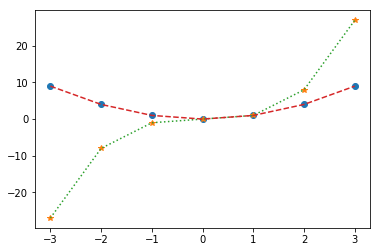

In [2]:
plt.plot(xValuesOfData, yValuesOfData1, 'o')
plt.plot(xValuesOfData, yValuesOfData2, '*')
plt.plot(xValuesOfData, yValuesOfData2, ':')
plt.plot(xValuesOfData, yValuesOfData1, '--') 
plt.show()

Can you see which string produces which style? For a complete list of the different markers and line styles, see the documentation of [`matplotlib.pyplot.plot`](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html). 

**Colour** of a plot can be selected manually by assigning the `color` parameter. It recognises several formats such as RGB tuples of float values (e.g. (1, 1, 1) is max red, max green and max blue, i.e. white!), hex RGB strings, or one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'} (which all represents a particular color). See this [link](https://matplotlib.org/3.1.1/api/colors_api.html#module-matplotlib.colors) for more options.

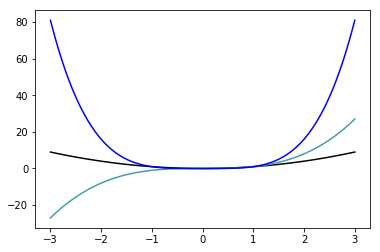

In [3]:
# Using a numpy function to generate an array of 100 elements uniformaly distributed from -3 to 3.
x = np.linspace(-3, 3, 100)   
plt.plot(x, x**2, color=(0, 0, 0)) # RBG tuple of float values
plt.plot(x, x**3, color='#3f9faa') # Hex RBG string. #ffffff is white, #000000 is black.
plt.plot(x, x**4, color='b')       # Single character string. 'b' for blue in this case.
plt.show()

Markerstyle, linestyle and colour can also be combined in one string argument. **Linewidth** and **markersize** are adjusted by assigning a float to the paramters `linewidth`/`lw` and `markersize`/`ms`, respectively.

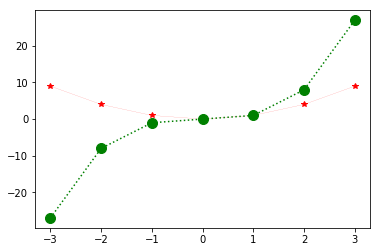

In [4]:
plt.plot(xValuesOfData, yValuesOfData1, 'r-*', linewidth=0.1) # Red stars with continous line in between.
plt.plot(xValuesOfData, yValuesOfData2, 'g:o', markersize=10) # Green circles with dotted line in between.
plt.show()

<a id='ff:2'></a>
### Size and resolution of figure
The **figure size** can be set by assigning a tuple of two floats to the optional parameter `figsize` in the function `plt.figure`. The two floats correspond to the width and height of the figure in inches. The **resolution** in terms of dots per inch (DPI), can be assigned to the optional `dpi` parameter. The DPI is by default 100.

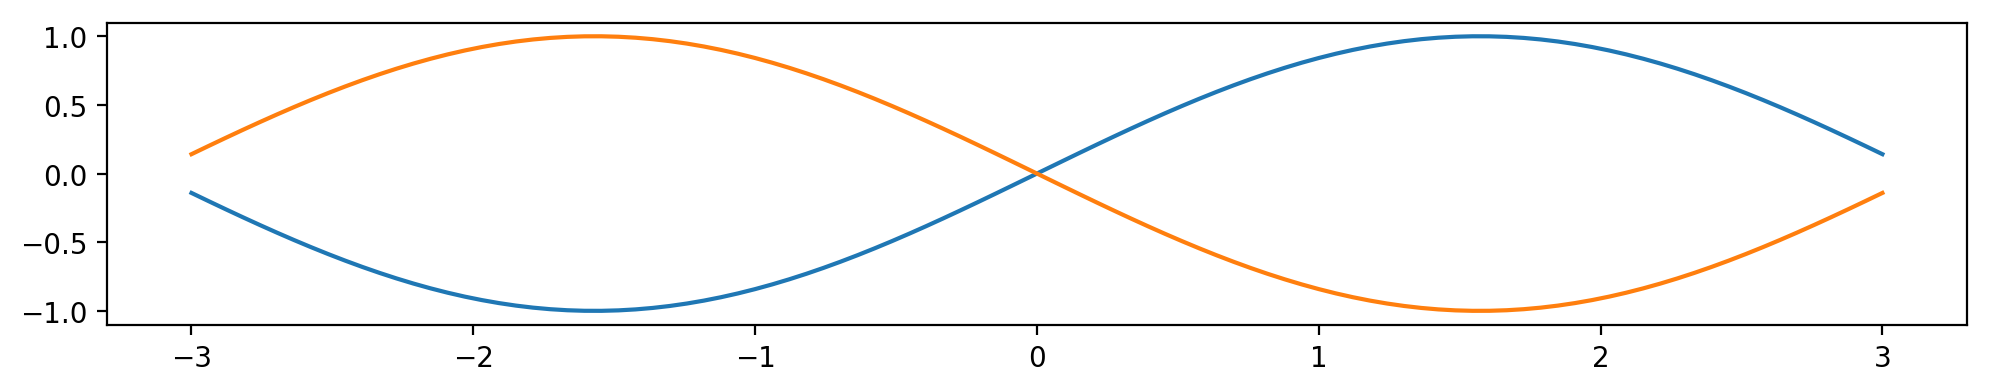

In [5]:
plt.figure(figsize=(12, 2), dpi=200) # Creates a new figure with width 12, height 2, and resolution 200 DPI.
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x + np.pi/2))
plt.show()

<a id='ff:3'></a>
### Fontsize, values  and limits of axes
Axes limitations are set by using `plt.xlim`and `plt.ylim`.

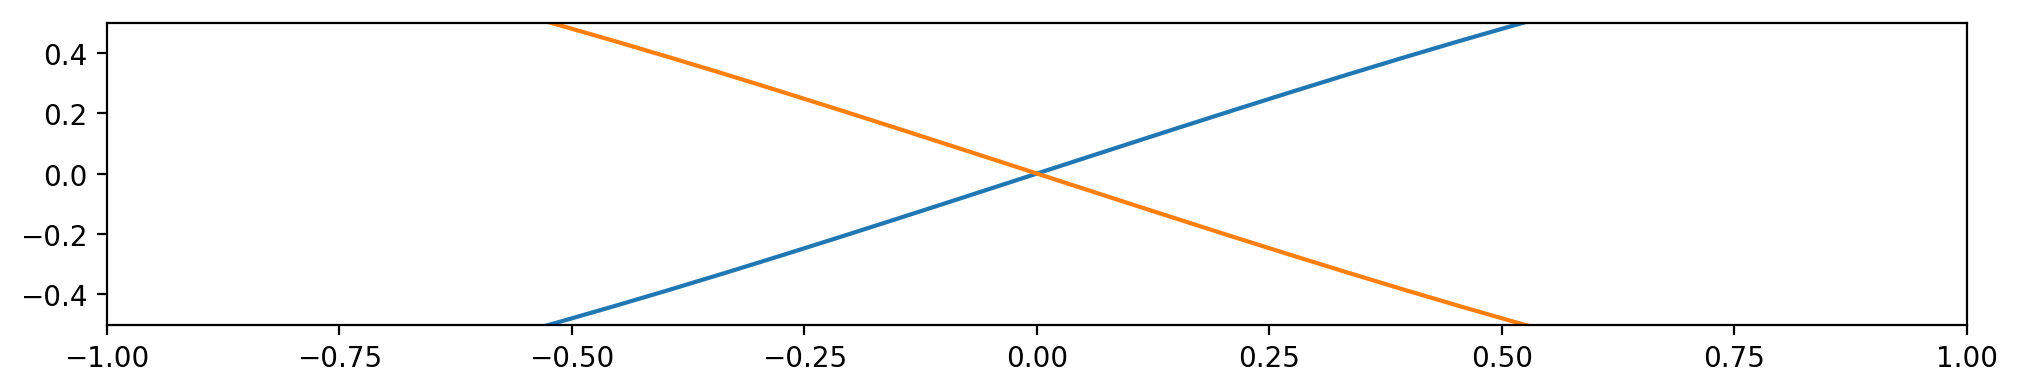

In [6]:
plt.figure(figsize=(12, 2), dpi=200)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x + np.pi/2))
plt.xlim(-1, 1)       # Set the left x-axis limit to -1 and the right to 1.
plt.ylim(-0.5, 0.5)   # Set the left y-axis limit to -0.5 and the right to 0.5.
plt.show()

Using `plt.xticks` and `plt.yticks` we can customise values on the axis. The first parameter is a list of positions at which ticks should be placed. The second parameter is optional and assigns labels to the ticks. The fontsize may be set using the optional argument `fontsize`. See below for an example.

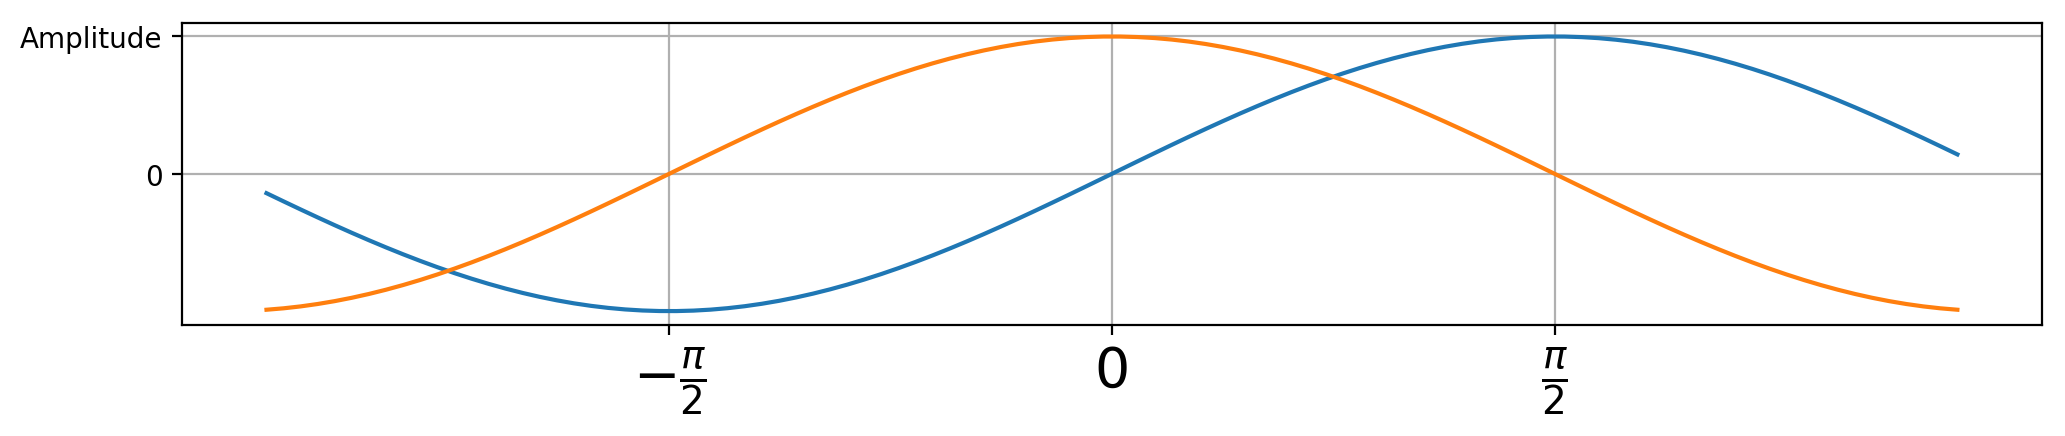

In [7]:
plt.figure(figsize=(12, 2), dpi=200)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

xticks = [-np.pi/2, 0, np.pi/2]    # x-axis ticks positions
yticks = [0, 1]                    # y-axis ticks positions
xticksLabels = [r'$-\frac{\pi}{2}$', 0, r'$\frac{\pi}{2}$'] # x-axis ticks labels
yticksLabels = [0, 'Amplitude']                             # y-axis ticks positions

# Set ticks and labels
plt.xticks(xticks, xticksLabels, fontsize=20) 
plt.yticks(yticks, yticksLabels)
# Activate grid, which is defined by the tick positions.
plt.grid() 
plt.show()

<a id='ff:4'></a>
### Setting common figure parameters
The default common figure parameters can be updated by assigning a Python dictionary to `plt.rcParams.update`.

In [8]:
newParams = {'figure.figsize'  : (12, 6),  # Figure size
             'figure.dpi'      : 200,      # figure resolution
             'axes.titlesize'  : 20,       # fontsize of title
             'axes.labelsize'  : 11,       # fontsize of axes labels
             'axes.linewidth'  : 2,        # width of the figure box lines
             'lines.linewidth' : 1,        # width of the plotted lines
             'savefig.dpi'     : 200,      # resolution of a figured saved using plt.savefig(filename)
             'ytick.labelsize' : 11,       # fontsize of tick labels on y axis
             'xtick.labelsize' : 11,       # fontsize of tick labels on x axis
             'legend.fontsize' : 12,       # fontsize of labels in legend
             'legend.frameon'  : True,     # activate frame on lengend?
            }
plt.rcParams.update(newParams) # Set new plotting parameters

For more properties to alter, see [here](https://matplotlib.org/3.1.1/tutorials/introductory/customizing.html). Updating common figure parameters is convenient to avoid writing the same code for several figures.

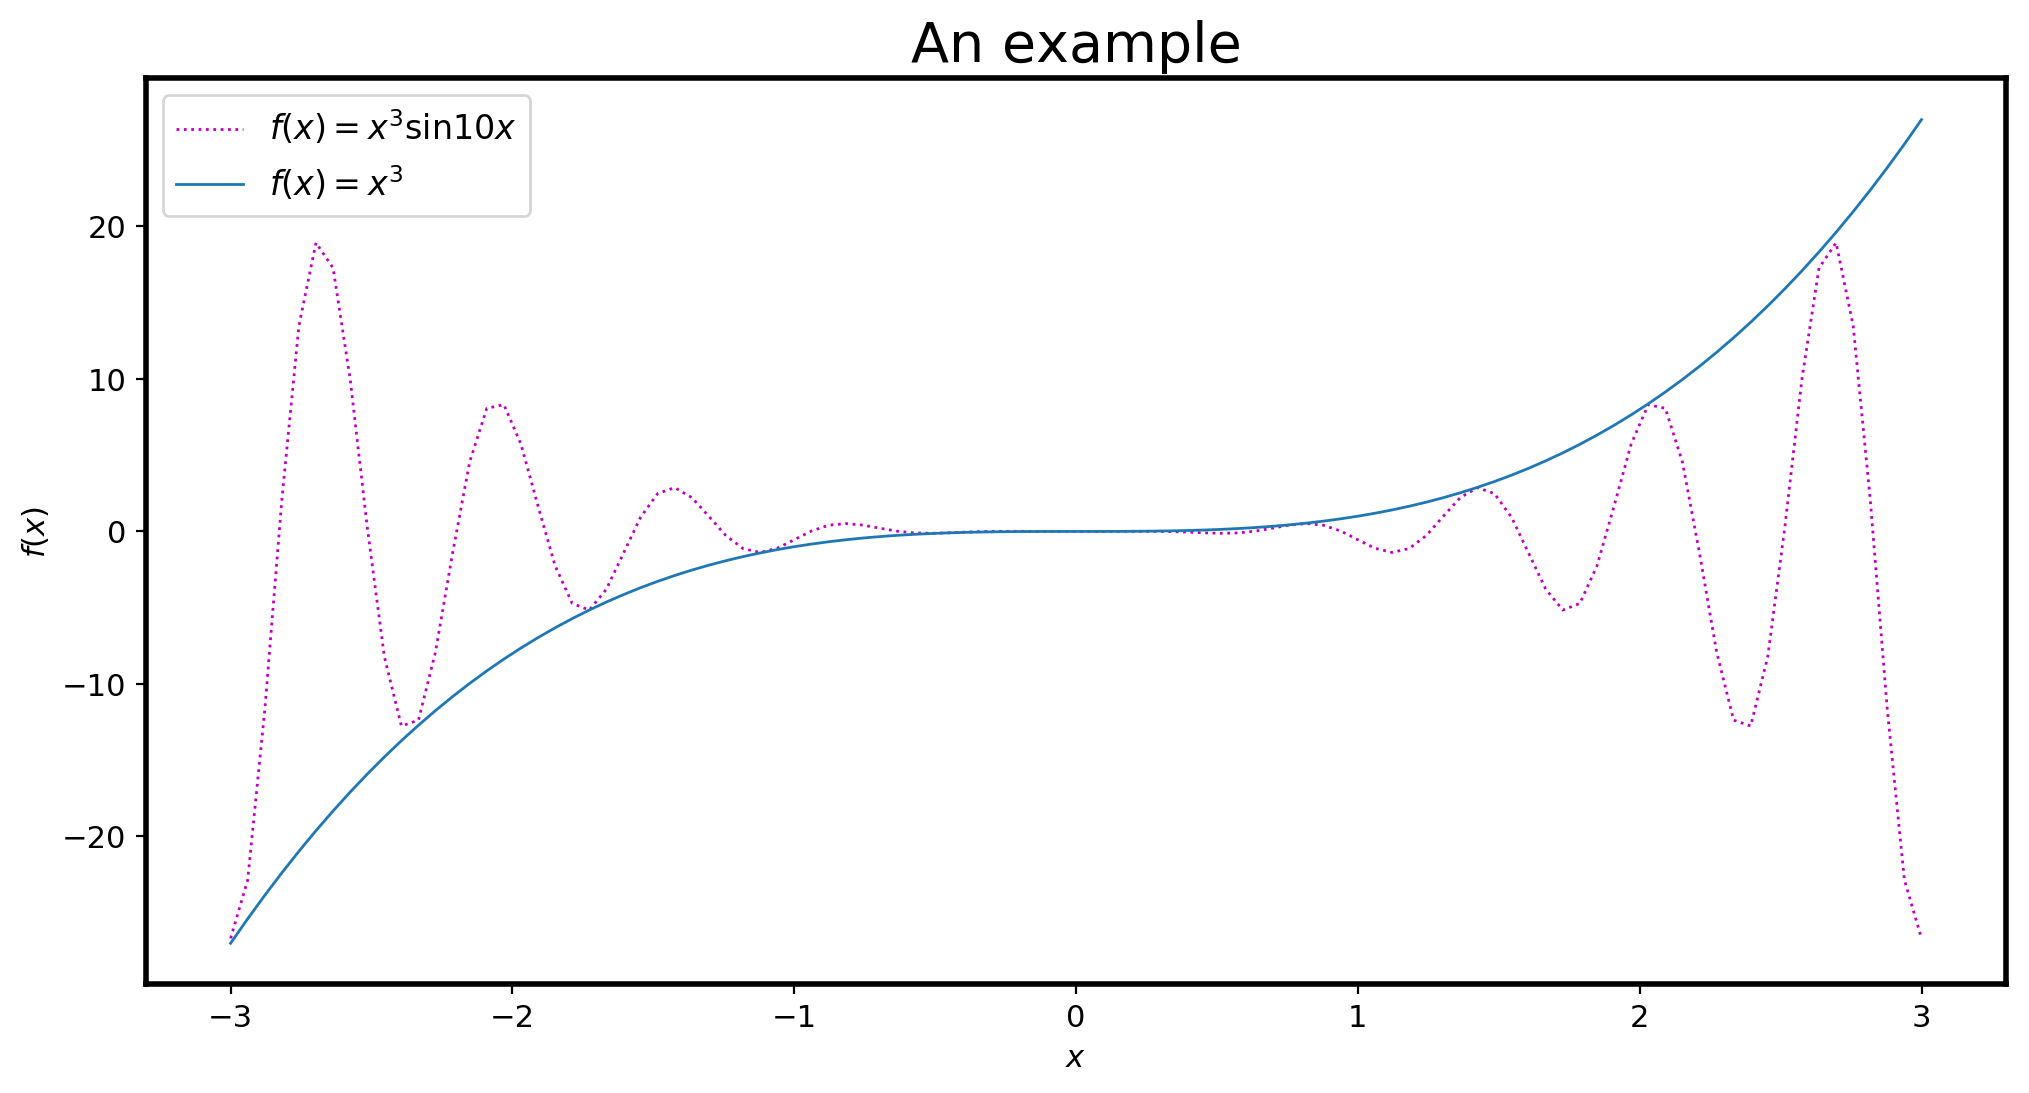

In [9]:
plt.plot(x, x**3*np.sin(10*x), 'm:', label='$f(x) = x^3\sin{10x}$')
plt.plot(x, x**3, label='$f(x) = x^3$')
plt.title('An example')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

<a id='ff:5'></a>
### Predefined style sheets
Matplotlib has several predefined style sheets that changes the style and properties of the figure. They are activated by assigning a specific string to the command `plt.style.use`. They also provide a style sheet [reference](https://matplotlib.org/3.1.1/gallery/style_sheets/style_sheets_reference.html). Below are three examples.

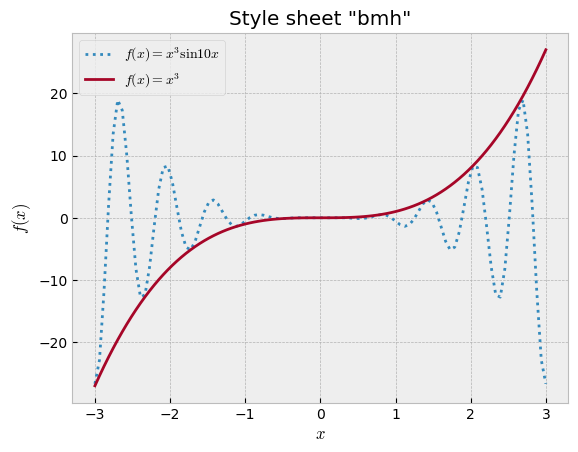

In [10]:
# In the code cell above, we manually updated the default parameters. Thus, we
# need to re-activate the default paramaters prior to activating a specific 
# style to see how it usually appears.
plt.style.use('default')

# Activate the style sheet 'bmh'.
plt.style.use('bmh')
plt.plot(x, x**3*np.sin(10*x), ':', label='$f(x) = x^3\sin{10x}$')
plt.plot(x, x**3, label='$f(x) = x^3$')
plt.title('Style sheet "bmh"')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

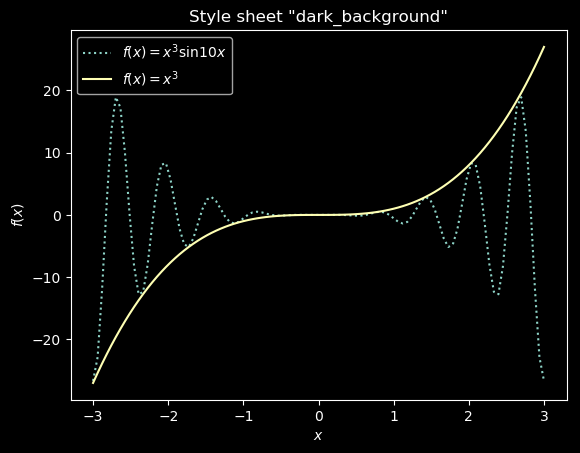

In [11]:
# Activate defualt matplotlib parameters
plt.style.use('default')
# Activate the style sheet 'dark_background'
plt.style.use('dark_background')
plt.plot(x, x**3*np.sin(10*x), ':', label='$f(x) = x^3\sin{10x}$')
plt.plot(x, x**3, label='$f(x) = x^3$')
plt.title('Style sheet "dark_background"')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

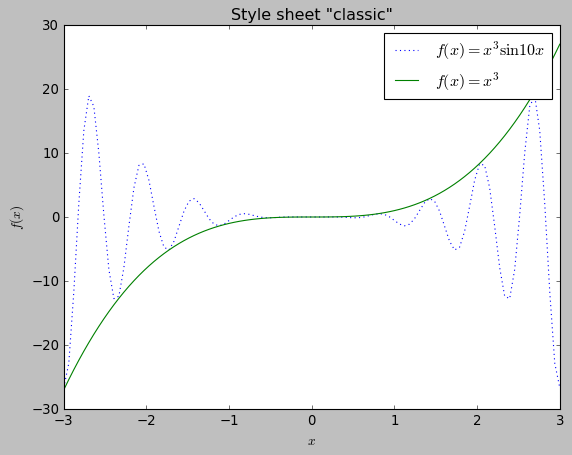

In [12]:
# Activate defualt matplotlib parameters
plt.style.use('default')
# Activate the style sheet 'classic'
plt.style.use('classic')
plt.plot(x, x**3*np.sin(10*x), ':', label='$f(x) = x^3\sin{10x}$')
plt.plot(x, x**3, label='$f(x) = x^3$')
plt.title('Style sheet "classic"')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

<a id="cc"></a>
## Colourmesh, contour, quiver and streamplots
What follows are plotting techniques particularly useful when you have a set of data points related to coordinates on a 2D grid.

### Colourmesh
The function `plt.pcolormesh` creates a rectangular grid of coloured cells. The color of each cell are specified by an input matrix $C$. Consider 
$$
C =
\begin{bmatrix}
0 & 3 & 0 \\
1 & 2 & 1 \\
0 & 1 & 0 
\end{bmatrix}.
$$

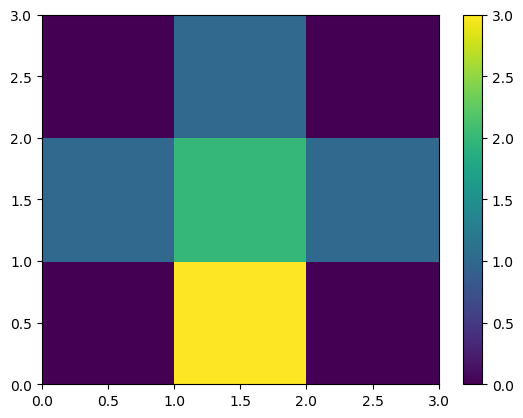

In [13]:
# Activate defualt matplotlib parameters
plt.style.use('default')

# Create 2D-array values to be colormapped.
C = np.array([[0, 3, 0], 
              [1, 2, 1], 
              [0, 1, 0]])

plt.pcolormesh(C)
plt.colorbar()  # Adds bar to relate colour to value
plt.show()

Without user specification, Matplotlib defines the coordinates of the quadrilateral corners 
automatically. In this case they choose the "first" row of $C$, $[\text{ }0\text{      }3\text{  } 0\text{ }]$, to have the lowest $y$ values on the grid, hence the plot is flipped upside down.

Typically, $C$ is given by a function dependent on the axis values, $f = f(x, y)$. In that case we rather want to specify the range of $x$ and $y$-values, and calculate the $C$ matrix thereafter. Consider 

$$ f(x, y) = \sin(xy),$$

and we want to make a colour plot with the limits $x\in[0, \pi]$, $y\in[0, \pi]$.

In [14]:
# The function f(x, y)
def f(x, y):
    return np.sin(x*y)

x = np.linspace(-np.pi, np.pi, 100) # x-values
y = np.linspace(-np.pi, np.pi, 100) # y-values

However, we cannot gain the desired matrix $C$ by just sending our `x` and `y` arrays into `f`. This would just return a 1D array. For each element in `x` we need to iterate over all values in `y` and call `f`. Fortunately, NumPy has a function `np.meshgrid` that takes in `x` and `y`, and returns two matrices that represent this iteration.

In [15]:
xx, yy = np.meshgrid([0, 1, 2], [0, 1, 2])
print(xx, '\n')
print(yy)

[[0 1 2]
 [0 1 2]
 [0 1 2]] 

[[0 0 0]
 [1 1 1]
 [2 2 2]]


Read more about the meshgrid function in our [intermediate NumPy notebook](). Using this we can finally plot our colour map.

Text(0, 0.5, '$y$')

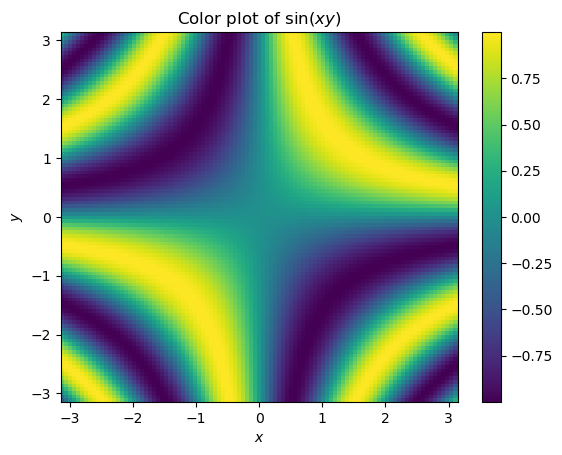

In [16]:
xx, yy = np.meshgrid(x, y)
C2 = f(xx, yy)
plt.pcolormesh(xx, yy, C2)
plt.colorbar()
plt.title('Color plot of $\sin(xy)$')
plt.xlabel('$x$')
plt.ylabel('$y$')

If `X` and `Y` are the 2D matrices of coordinates, then the corners of cell `C[i, j]` and `C[i, j+1]` is set as in figure 1 below.
$$ $$
<a name="fig:1"></a>
<img src="https://www.numfys.net/media/notebooks/images/pcolormesh_2.png" width="600">
**Figure 1:** *How `pcolormesh` choose the corners of the color cells based on the values of the `X` and `Y` matrices.*

Thus, `X` and `Y` should have one row and column more than `C`. If they are of equal shape, the last row and column in `C` will be omitted.

### Contour
Simply put, the function `plt.contour` plots contours. It draws lines where the function/matrix $f$/$C$ has the same value. `plt.contour` has the same parameters as for `plt.pcolormesh`, a 2D matrix $C$ with the values over which the lines are drawn, and optional $x$ and $y$ coordinate matrices (made using `plt.meshgrid`). `plt.contourf` draws filled contours. The optional parameter `levels` determine the number of contour lines drawn.

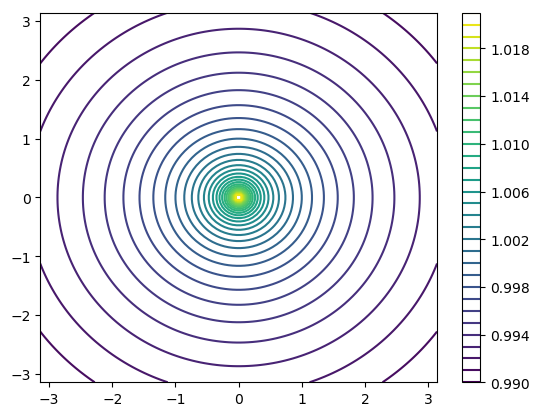

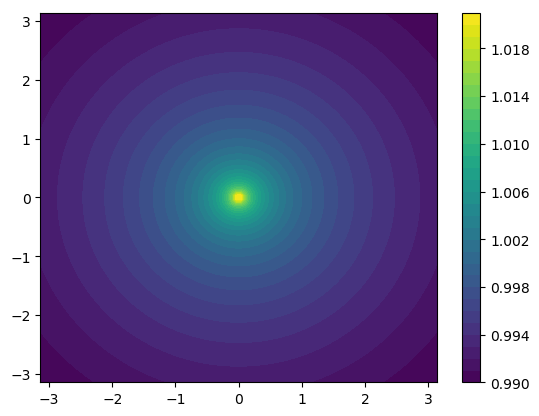

In [17]:
# Example function g
def g(x, y):
    return (x**2 + y**2)**(-1/300)

# Generate C-matrix
C3 = g(xx, yy)
# Draw contour lines
plt.contour(xx, yy, C3, 30)
plt.colorbar()
plt.show()

# Draw filled contours
plt.contourf(xx, yy, C3, 30)
plt.colorbar()
plt.show()

### Quiver plot
`plt.quiver` is perfect if you are plotting a 2D vector field. Given the $x$ and $y$ components of the vectors it plots arrows in the corresponding direction.

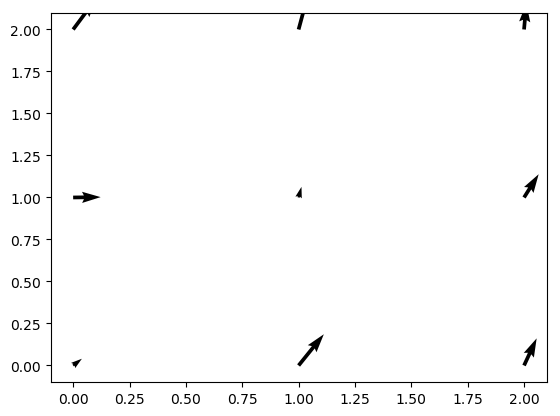

In [18]:
xComponents = np.random.rand(3, 3) # a 3x3 matrix of random number between (0, 1)
yComponents = np.random.rand(3, 3)

plt.quiver(xComponents, yComponents)
plt.show()

The positions of the arrows can also can assigned by 2D coordinate matrices created using `np.meshgrid`. In addition, the arrows can be color coded using the parameter `C`.

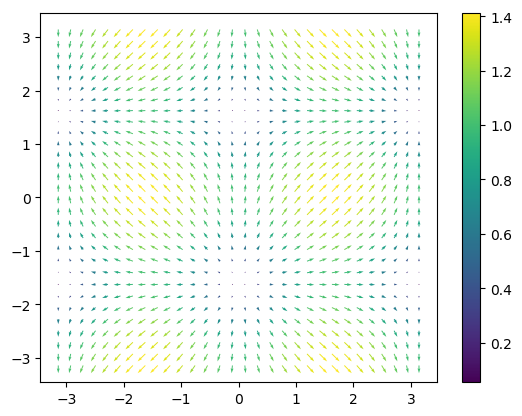

In [19]:
x2 = np.linspace(-np.pi, np.pi, 30) # x-values
y2 = np.linspace(-np.pi, np.pi, 30) # y-values
xx2, yy2 = np.meshgrid(x2, y2)      # x and y grid point coordinates

U = np.sin(xx2) # x-component of arrows
V = np.cos(yy2) # y-component of arrows
C4 = np.linalg.norm(np.array([U, V]), axis=0) # the absolute magnitude of the arrows
# Plot quivers (arrows) specified coordinates with colourcoding
plt.quiver(xx2, yy2, U, V, C4)
# Colourbar reflecting the magnitude of each colour
plt.colorbar()
plt.show()

### Streamplot
A streamplot can be used to display a 2D vector flow. 

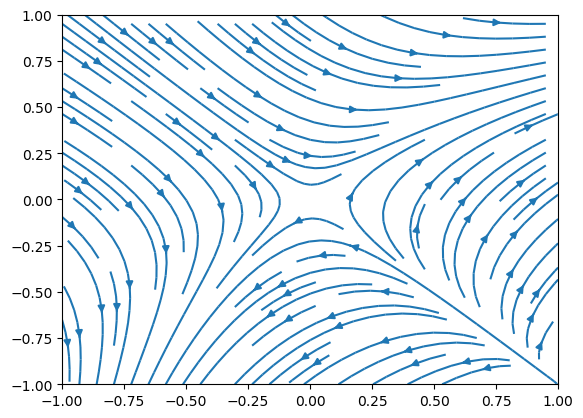

In [20]:
xValues = np.linspace(-1, 1, 100)
yValues = np.linspace(-1, 1, 100)
xx, yy = np.meshgrid(xValues, yValues) # x and y grid point coordinates
xComponents = xx**2 + yy # Define x-components of the vectors
yComponents = xx - yy**2 # Define y-components of the vectors
plt.streamplot(xx, yy, xComponents, yComponents)
plt.show()

Several parameters can be varied to contain more information in the streamplot, such as streamline density, color and linewidth (check out this [example](https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/plot_streamplot.html#sphx-glr-gallery-images-contours-and-fields-plot-streamplot-py)).

<a id='sp'></a>
## Subplots
Creating subplots allows you to produce several plots in the same figure, but on separate axes. One way of creating subplots is by using the wrapper `plt.subplot` where the only mandatory parameter is a three digit integer (or three integers separated by a comma).

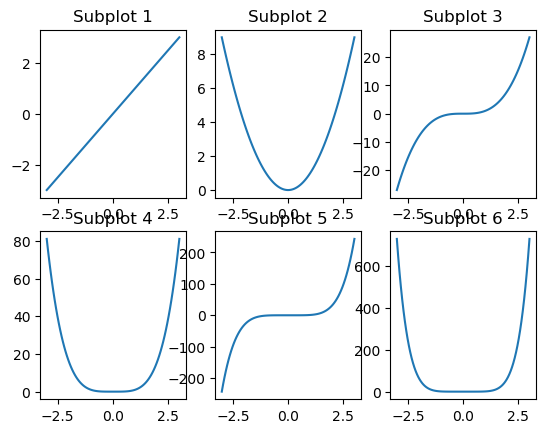

In [21]:
plt.style.use('default')
x = np.linspace(-3, 3, 100)

# Create subplot indexed 1 in a figure with a grid of 2 rows 2 columns.
plt.subplot(231)
plt.plot(x, x)
plt.title('Subplot 1')

# Create subplot with index position 2
plt.subplot(232)
plt.plot(x, x**2)
plt.title('Subplot 2')

# Create subplot with index position 3
plt.subplot(233)
plt.plot(x, x**3)
plt.title('Subplot 3')

# Create subplot with index position 4
plt.subplot(234)
plt.plot(x, x**4)
plt.title('Subplot 4')

# Create subplot with index position 5
plt.subplot(235)
plt.plot(x, x**5)
plt.title('Subplot 5')

# Create subplot with index position 5
plt.subplot(236)
plt.plot(x, x**6)
plt.title('Subplot 6')

plt.show()

From the example above, we see that the first and second digit in the `subplot` argument sets the number of rows and columns of a grid with subplots. The third digit specifies which subplot you are referring to by the grid position index. We also see that the some padding is needed between the subplot titles and the axes. This can be fixed in several ways, e.g. by defining a bigger figure size using `plt.figure(figsize=figsize)` before creating the subplots or by using `plt.tight_layout` after the creation of subplots.

Both `plt.figure()` and `plt.subplot` returns an object (an instance of a Python class) that can be useful to define. Using these objects, the possibilities of figure modification is endless. Looking up examples in the Matplotlib documentation is strongly recommended. Below is and example showing some features.

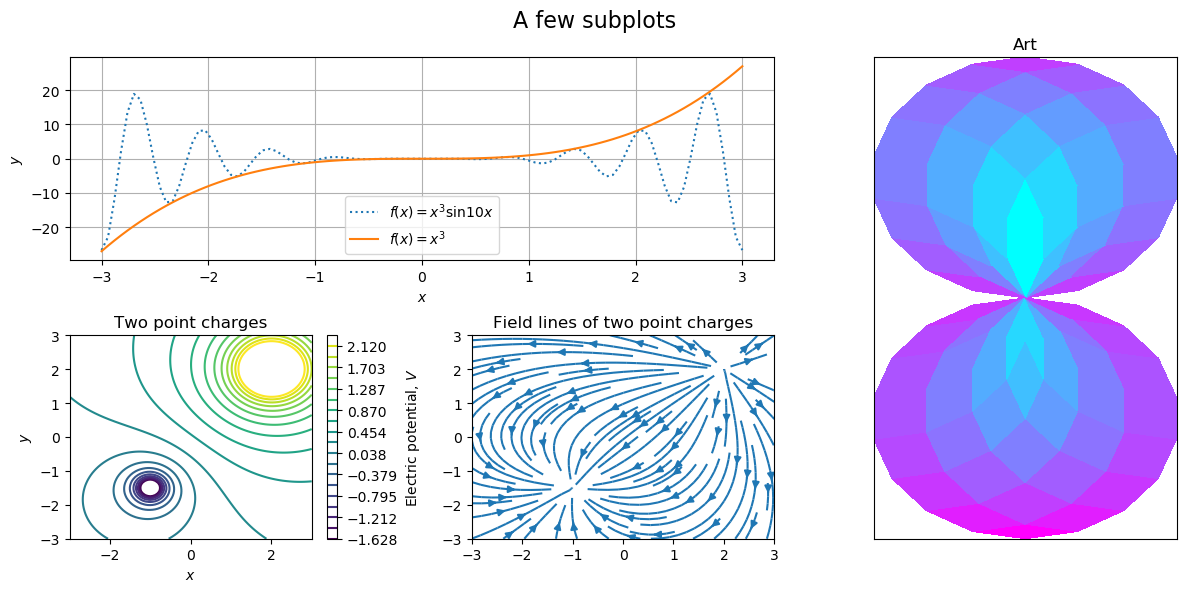

In [22]:
fig = plt.figure(figsize=(12, 6))  # Create figure and determine size
ax1 = plt.subplot(2, 3, (1, 2))    # Create an elongated subplot using two grid indicies
ax2 = plt.subplot(234)         
ax3 = plt.subplot(235)
ax4 = plt.subplot(2, 3, (3, 6))

# Create two sets of 1D x and y values
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x2 = np.linspace(-np.pi/2, np.pi/2, 10)
y2 = np.linspace(-np.pi/2, np.pi/2, 10)
# Create two sets of 2D coordinates
xx, yy = np.meshgrid(x, y)
xx2, yy2 = np.meshgrid(x2, y2)

# Make plots on elongated subplot
# Subplot 1 and 2 (axis 1)
ax1.plot(x, x**3*np.sin(10*x), ':', label='$f(x) = x^3\sin{10x}$')
ax1.plot(x, x**3, label='$f(x) = x^3$')
ax1.set_xlabel('$x$') # This is how you set the label on an axis object
ax1.set_ylabel('$y$')
ax1.legend()
ax1.grid()

# Subplot 4 (axis 2)
# Plotting the electric potential produced by two point charges 
# using contour plot
e1 = 2       # Charge of point charge 1
e2 = -0.5    
e1PosX = 2   # X position of point charge 1
e1PosY = 2
e2PosX = -1
e2PosY = -1.5
# Define a function that returns the electric potential at a coordinate
def E_potential(x, y):
    r1 = np.sqrt((e1PosX - x)**2 + (e1PosY - y)**2) # Distance to point charge 1
    r2 = np.sqrt((e2PosX - x)**2 + (e2PosY - y)**2)
    return e1/r1 + e2/r2
V = E_potential(xx, yy) # Create a 2D matric containing the potential at each coordinate
# The potential approaches +/- infinite close to the charges.
# Need to mask out those values.
levels  = np.linspace(np.min(V)*0.05, np.max(V)*0.05, 20)
# Plot the contours and decleare an object
contour = ax2.contour(xx, yy, V, levels)
# Add colobar
cbar    = fig.colorbar(contour, ax=ax2)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
# Add description to the colorbar
cbar.ax.set_ylabel('Electric potential, $V$')
ax2.set_title('Two point charges') # This is how you set the title to an axis object

# Subplot 5 (axis 3)
# Plot a streamplot of the electric field around the point charges
Ey, Ex  = np.gradient(-V)
ax3.streamplot(xx, yy, Ex, Ey)
ax2.set_xlabel('$x$')
ax2.set_ylabel('$y$')
ax3.set_title('Field lines of two point charges')

# Subplot 3 and 6 (axis 4)
# Plot a pretty figure using pcolormesh
Qx = np.cos(yy2) - np.cos(xx2)   # Redefine coordinates for the color cells
Qz = np.sin(yy2) + np.sin(xx2)
C = np.sqrt(xx2**2 + yy2**2)     
ax4.pcolormesh(Qx, Qz, C, cmap='cool') # Changed the colors
# Remove x ticks
ax4.set_xticks([])
ax4.set_yticks([])
ax4.set_title('Art')

fig.suptitle('A few subplots', fontsize=16)
fig.tight_layout()  # Adjusts suplots to avoid overlapping titles etc.
fig.subplots_adjust(top=0.9) # increase space between top of figure and first subplots.
plt.show()

As a final note, one may use the function `plt.subplots` to create an one or two dimensional array of axes, such as below.

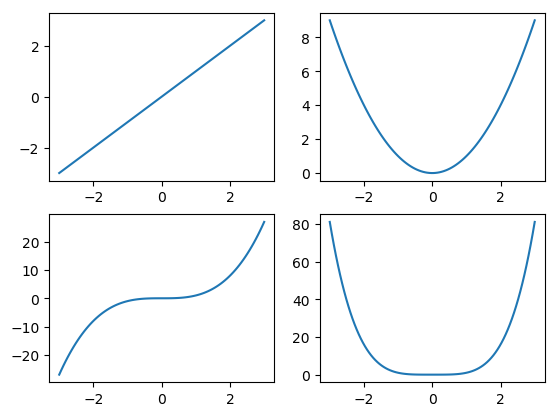

In [23]:
figure, axes = plt.subplots(2, 2)
axes[0, 0].plot(x, x)
axes[0, 1].plot(x, x**2)
axes[1, 0].plot(x, x**3)
axes[1, 1].plot(x, x**4)
plt.show()

<a id="3d"></a>
## 3D plots
3D plots are easily by adding a projection parameter to the creation of a subplot, although we need to import a specific library to enable it. For the example below and more advanced ones, see the [mplot3d tutorial](https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html).

<IPython.core.display.Javascript object>


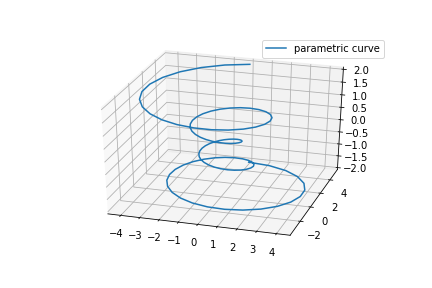

In [25]:
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook
plt.figure()
# Adding the projection '3d' to get a 3d suplot
plt.subplot(projection='3d')
theta = np.linspace(-4*np.pi, 4*np.pi, 100)
z = np.linspace(-2, 2, 100)
r = z**2 + 1
x = r * np.sin(theta)
y = r * np.cos(theta)
plt.plot(x, y, z, label='parametric curve')
plt.legend()
plt.show()

___
## Further reading
A wide range of simple and fancy figures and plots are available at the Matplotlib [documentation](https://matplotlib.org/contents.html#). They also have introductory, intermediate and advanced [tutorials](https://matplotlib.org/tutorials/index.html).